In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
import sympy as sym

# Curvas e campos vetoriais

## $ \S 1 $ Visualizando curvas no espaço

Uma __curva__ (parametrizada) em $ \mathbb R^n $ é uma função $ \boldsymbol r \colon I
\to \mathbb R^n $ definida num intervalo $ I $.  

__Exemplo 1:__ Sejam $ \boldsymbol p $ e $ \boldsymbol q $ dois pontos distintos
quaisquer em $ \mathbb R^3 $ (ou $ \mathbb R^n $). O _segmento de reta_
ligando $ \boldsymbol p $ a $ \boldsymbol q $ é parametrizado por
$$
\boldsymbol r(t) = \boldsymbol p + t\, (\boldsymbol q - \boldsymbol p)
= (1- t)\, \boldsymbol p + t\, \boldsymbol q
\qquad \text{para $ t \in [0, 1] \,$.}
$$
Se estendermos o domínio a $ \mathbb R $, obteremos uma parametrização da _reta_
por $ \boldsymbol p $ e $ \boldsymbol q $, e se restringirmos $ t $ a $ [0, +\infty) $,
obteremos uma parametrização da _semi-reta_ com origem em $ \boldsymbol p $ de
direção $ \boldsymbol q - \boldsymbol p $.

__Exercício:__ Calcule a derivada da curva parametrizada $ \boldsymbol r $ do
Exemplo 1. O que acontece se trocarmos $ t $ por $ 1 - t $ na definição? O que
acontece se alterarmos o domínio para $ \big[0, \frac{1}{2}\big] $ e
substituirmos $ t $ por $ 2t $?

Se pensarmos numa curva parametrizada $ \boldsymbol r(t) $ como a descrição da
posição de uma partícula com respeito ao tempo $ t $, então a
derivada $ \boldsymbol r'(t) $ representará a sua _velocidade_, a norma (magnitude)
$ \Vert \boldsymbol r'(t) \Vert $ da derivada a sua _rapidez_, e a segunda derivada
$ \boldsymbol r''(t) $ a sua _aceleração_.

__Exemplo 2:__ Uma _hélice_ sobre o cilindro em $ \mathbb R^3 $ de raio $ a > 0 $ 
descrito pela equação $ x^2 + y^2 = a^2 $ pode ser parametrizada por
$$
    \boldsymbol r(t) = a\cos(2\pi t)\,\boldsymbol i + a\sin (2\pi t)\,\boldsymbol j + bt\,\boldsymbol k\,.
$$
Aqui
$$
    \boldsymbol i = \boldsymbol{e}_1 = (1, 0, 0), \qquad 
    \boldsymbol j = \boldsymbol{e}_2 = (0, 1, 0), \qquad 
    \boldsymbol k = \boldsymbol{e}_3 = (0, 0, 1),
$$
são os três vetores da base canônica de $ \mathbb R^3 $ e $ b \ne 0 $ é a
diferença de altura correspondente a uma rotação completa.  Intuitivamente, a
imagem da hélice se parece com uma mola. Vamos visualizá-la usando a Matplotlib;
a sintaxe é praticamente idêntica àquela para o desenho de gráficos de uma
função de uma variável. Por concretude, tomemos $ a = b = 1 $.

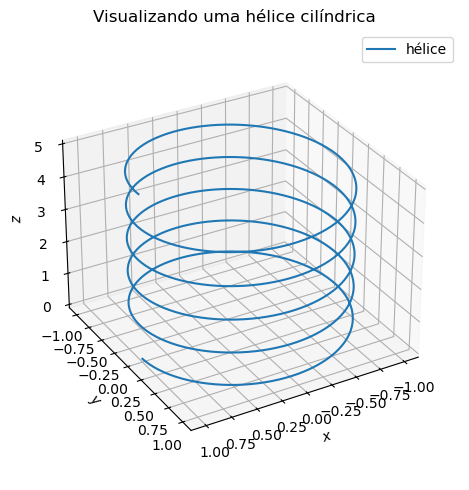

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da hélice:
a = 1  #  raio
b = 1  #  passo

# Amostra de valores de t:
ts = np.linspace(0, 5, 1000)  # 1000 pontos em [0, 5]

# Temos que descrever as funções-coordenadas da curva. As equações paramétricas são:
xs = a * np.cos(2 * np.pi * ts)
ys = a * np.sin(2 * np.pi * ts)
zs = b * ts

# Plotando a hélice:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(projection="3d")
ax.plot(xs, ys, zs, label="hélice")

# Adicionando uma legenda, um título e rótulos aos eixos:
ax.legend()
ax.set_title("Visualizando uma hélice cilíndrica")
ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_zlabel("$ z $")

# Ajustando o ângulo de visualização:
ax.view_init(elev=30, azim=60)
# Reduzindo o zoom para não encobrir a etiqueta do eixo-z:
ax.set_box_aspect(aspect=None, zoom=0.9)

# Mostrando o resultado:
fig.tight_layout()
plt.show()

Utilizando o submódulo `animation` do Matplotlib, podemos até criar uma animação ilustrando o movimento de uma partícula que se desloca de acordo com esta parametrização.

In [28]:
# Importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

# Parâmetros da nossa hélice:
a = 1  # raio
b = 1  # passo

# Amostra de valores de t:
ts = np.linspace(0, 5, 200)

# Equações paramétricas:
xs = a * np.cos(2 * np.pi * ts)
ys = a * np.sin(2 * np.pi * ts)
zs = b * ts

# Configuração da figura e dos eixos 3D:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(projection="3d")

# Delimitando a região a ser mostrada:
ax.set_xlim([-a, a])
ax.set_ylim([-a, a])
ax.set_zlim([0, b * 5])

# Adicionando um título e rótulos aos eixos:
ax.set_title("Movimento helicoidal no cilindro $ x^2 + y^2 = 1 $")
ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_zlabel("$ z $")

# Curva inicial vazia:
line, = ax.plot([], [], [], linewidth=2)

# Função de inicialização para definir a curva:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

# Função para atualizar os quadros (frames) da animação:
def update(T):
    # Plotando a imagem da curva para t entre 0 e T:
    line.set_data(xs[:T], ys[:T])
    line.set_3d_properties(zs[:T])
    return line,

# Criando a animação:
ani = animation.FuncAnimation(fig, update, frames=len(ts), init_func=init,
                              interval=50, blit=False)

plt.close()  # Suprimindo a figura estática que aparece depois do vídeo
# Retornando o resultado:
HTML(ani.to_jshtml());

Animation size has reached 21014742 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


📝 Recorde que para salvar um gráfico num arquivo externo, podemos utilizar
`plt.savefig("meu_grafico.png")` antes de `plt.show()`. Para salvar uma animação
(digamos `ani`), utilize `ani.save("minha_animacao.mp4", writer="ffmpeg")`.
Neste último caso, é necessário ter o pacote `ffmpeg` instalado no computador.

__Exercício:__ Mostre (sem ajuda do Python) que a velocidade e aceleração de
uma partícula cujo movimento é descrito pela hélice parametrizada do exemplo
anterior são ortogonais para todo $ t $. _Dica:_ Calcule o produto interno
$ \boldsymbol r'(t) \cdot \boldsymbol r''(t) $.

__Exercício:__ Plote as seguintes curvas parametrizadas.  A imagem é uma curva
familiar? Descreva esta imagem através de equações cartesianas.

(a) A curva no plano descrita por
$$
    \alpha(t) = (t^2 - 1)\,\boldsymbol i + 2t\,\boldsymbol j\,.
$$
_Dica:_ Como esta curva é planar (i.e., a imagem está em $ \mathbb R^2 $),
você deve omitir o argumento `"projection=3d"` da função `fig.add_subplot()`.

(b) A curva no espaço descrita por
$$
    \beta(t) = \sqrt{2}\, t\, \boldsymbol i + \sqrt{2}\, t\, \boldsymbol j + (4 - t^2)\, \boldsymbol k\,.
$$

(c) A curva no espaço descrita por
$$
    \gamma(t) = \big(\cosh (3t)\,,\, \operatorname{senh}(3t)\,,\, \operatorname{senh}(3t) \big)
$$
onde por definição o _cosseno hiperbólico_ e o _seno hiperbólico_ são as funções $ \mathbb R \to \mathbb R $ dadas por
$$
\cosh t = \frac{e^t + e^{-t}}{2} \qquad \text{e} \qquad \operatorname{senh} t = \frac{e^t - e^{-t}}{2}\,.
$$
_Dica:_ Observe que $ \cosh^2 t - \operatorname{senh}^2 t = 1 $ para todo $ t $.

## $ \S 2 $ Campos vetoriais

__Exemplo 1:__ Considere um planeta com massa $ M $ localizado na origem de um
sistema de coordenadas. O _campo gravitacional_ $ \boldsymbol{g} $ gerado por ele é
pode ser expresso como uma função
$$
    \boldsymbol{g} \colon \mathbb{R}^3 \to \mathbb{R}^3, \qquad
    \boldsymbol{g}(\boldsymbol{x}) = -\frac{GM}{\Vert\boldsymbol{x}\Vert^3}\, \boldsymbol{x}
$$
onde $ \boldsymbol{x} = (x, y, z) $ é o vetor posição de um ponto arbitrário e $ G $
é a constante gravitacional.

Generalizando este exemplo, um **campo vetorial** é uma função 
$$
    \boldsymbol F \colon D \subseteq \mathbb R^m \to \mathbb R^n
$$
que atribui um _vetor_ de $ \mathbb R^n $ a cada ponto do seu domínio $ D $,
subconjunto de $ \mathbb R^m $.

Observe que uma curva pode ser considerada um campo vetorial cujo domínio tem
dimensão $ 1 $, enquanto uma função escalar $ f $ de várias variáveis é um
"campo vetorial" cujo contra-domínio tem dimensão $ 1 $.  Contudo, _na maioria
das aplicações de campos vetoriais, temos_ $ m = n \ge 2 $.

Um campo de vetores tridimensionais definido numa região de $ \mathbb R^3 $ pode
ser descrito através de uma fórmula do tipo
$$
    \boldsymbol{F}(x, y, z) = M(x, y, z)\,\boldsymbol{i} + N(x, y, z)\,\boldsymbol{j}
    + P(x, y, z)\,\boldsymbol{k}\,.
$$
Aqui as **componentes** $ M $, $ N $ e $ P \colon D \to \mathbb R $ são funções
escalares, ou seja, tomam valores em $ \mathbb R $. 
O campo vetorial $ \boldsymbol F $ é dito **contínuo** se as suas componentes são
contínuas; **diferenciável** se $ M $, $ N $ e $ P $ são diferenciáveis; e assim
por diante. 

Mais geralmente, um campo vetorial $ \boldsymbol F \colon D \subseteq \mathbb R^m
\to \mathbb R^n $ pode ser expresso em termos das suas componentes $ f_i \colon
D \subseteq \mathbb R^m \to \mathbb R $ com respeito à base canônica de
$ \mathbb R^n $:
$$
    \boldsymbol F = f_1\,\boldsymbol{e}_1 + \cdots + f_n\,\boldsymbol{e}_n\,.
$$
Em última instância podemos portanto reduzir qualquer conceito ou pergunta a
respeito de $ \boldsymbol F $ noutro equivalente envolvendo suas componentes $ f_i $,
que são funções escalares. Por exemplo, qualquer derivada parcial de $ \boldsymbol F
$ é, por definição, o resultado da derivação parcial correspondente de cada uma
de suas componentes.  Apesar de não haver nenhuma diferença na teoria de campos
vetoriais tomando valores em espaços de dimensão alta, conforme esta aumenta, a
visualização se torna mais difícil.

## $ \S 3 $ Visualizando campos vetoriais bidimensionais

__Exemplo:__ Seja $ \boldsymbol F $ o campo vetorial no plano dado por
$$
\boldsymbol{F}(x, y) = -y\,\boldsymbol{i} + x\,\boldsymbol{j}
$$
Informalmente, os vetores descritos por $ \boldsymbol F $ giram no sentido
anti-horário ao redor da origem e têm a mesma magnitude que o seu ponto-base.
Vamos usar a Matplotlib para visualizá-lo.

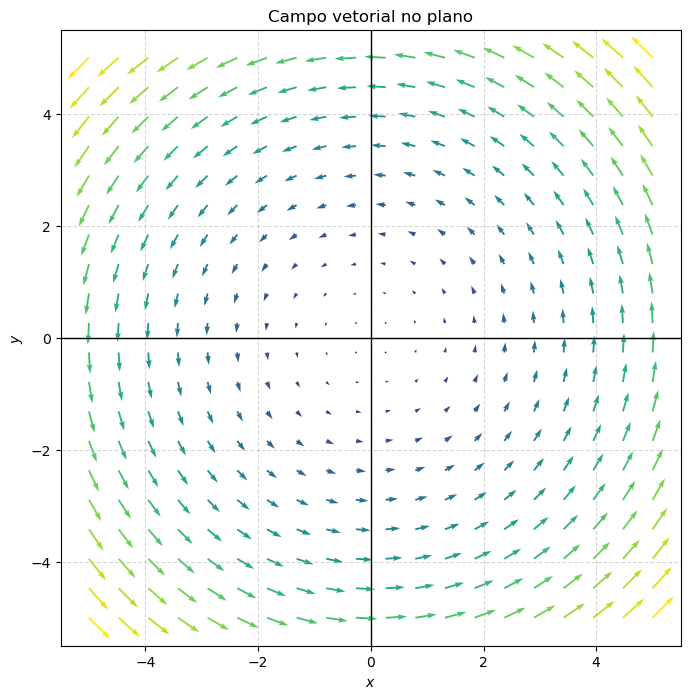

In [22]:
# Tomando uma amostra de valores de x e y:
xs = np.linspace(-5, 5, 20)  # 20 pontos igualmente espaçados em [-5, 5]
ys = np.linspace(-5, 5, 20)

# Criando a malha de pontos onde F será avaliado a partir de xs e ys:
X, Y = np.meshgrid(xs, ys)

# Definindo o campo vetorial:
U = -Y  # primeira componente
V = X   # segunda componente

# Criando a figura para plotagem:
plt.figure(figsize=(8, 8))  # Tamanho da figura

# Vamos usar a magnitude do campo em cada ponto como especificação para a sua cor:
norma = np.sqrt(U**2 + V**2)  
# Plotando o campo vetorial:
plt.quiver(X, Y, U, V, norma, cmap="viridis")  # Plota o campo nos pontos da malha

# Etiquetando os eixos e adicionando um título:
plt.xlabel("$ x $") 
plt.ylabel("$ y $")
plt.title("Campo vetorial no plano")

# Plotando os dois eixos cartesianos com uma espessura maior:
plt.axhline(0, color="black",linewidth=1)
plt.axvline(0, color="black",linewidth=1)

# Adicionando uma grade ao fundo, para auxiliar a visualização:
plt.grid(linestyle = "--", alpha=0.5)   # alpha controla a transparência

# Mostrando o resultado:
plt.show()

__Exercício:__ O que acontece com a figura do exemplo anterior se:

(a) Aumentarmos o número de pontos na malha (aumentando o terceiro argumento de
    `linspace` nas definições de `xs` e `ys`) no código acima?

(b) Trocarmos o campo $ \boldsymbol F $ por $ \boldsymbol x(x, y) = x\,\boldsymbol i + y\,\boldsymbol j $? (Observe
    que este é o campo identidade $ \mathbb R^2  \to \mathbb R^2 $, que leva cada ponto/vetor nele mesmo).

(c) Trocarmos o campo $ \boldsymbol F $ por $ \boldsymbol H(x, y) = y\,\boldsymbol i + x\,\boldsymbol j $?

__Exercício:__  O campo vetorial seguinte pode ser usado para modelar o fluxo de
um fluido a partir de uma fonte circular de raio $ r $ com rapidez inicial
$ u > 0 $:
$$
\boldsymbol{F}(x, y) = \frac{u}{2} \left( 1 + \frac{r^2}{\Vert\boldsymbol{x}\Vert^2}
\right) \frac{\boldsymbol{x}}{\Vert\boldsymbol{x}\Vert} \qquad \text{para $ \Vert
\boldsymbol{x} \Vert > r $}\,,
$$
onde $ \boldsymbol x = x\,\boldsymbol{i} + y\,\boldsymbol{j} $ é o campo vetorial identidade
em $ \mathbb R^2 $.

Observe que a expressão à direita não está definida em $ \boldsymbol x = \boldsymbol 0
$, mas por definição estamos excluindo toda a região dentro do disco de raio $ r
$, que representa a fonte de onde o fluido emana. Para simplificar, assuma que $
u = 1 $ e $ r = 1 $. Use uma máscara booleana para definir o valor do campo
vetorial como sendo `np.nan` dentro deste disco, e então plote $ \boldsymbol F $
completando o fragmento de código abaixo.

In [ ]:
# Defina amostras de valores de x e y dentro do quadrado [-2, 2] x [-2, 2]:
xs = # ...
ys = # ...

# Crie a malha de pontos:
X, Y = # ...

# Defina o campo vetorial F por partes:
r = 1  # Raio do obstáculo circular
u = 1  # Velocidade do fluxo uniforme

# Defina a função que calcula a norma de um vetor em R^2:
norma = lambda x, y: # ... Use a função raiz quadrada (np.sqrt)

# Defina as componentes de F:
U =  # complete a expressão para a primeira componente
V =  # complete a expressão para a segunda componente

# Vamos filtrar os pontos dentro do disco de raio r (onde F não está definido,
# de acordo com o enunciado) e declarar que F vale `np.nan` ("Not A Number", ou
# "não é um número") aí, para conseguirmos visualizar F mesmo esta região:
filtro = norma(X, Y) <= r
U[filtro] = np.nan
V[filtro] = ...

# Agora plote o campo!
# plt.figure ...
# plt.quiver ...
# Etique o eixo-x
# Etique o eixo-y
# Adicione o título

# Trace o eixo-x
# Trace o eixo-y
# Adicione o grid retangular

# Mostre o resultado

SyntaxError: invalid syntax (3392178585.py, line 5)

__Exercício:__ Considere o campo vetorial em $ \mathbb R^2 $ dado por:
$$
    \boldsymbol G(x, y) = (\sin y − y \sin x + x)\,\boldsymbol i
    + (\cos x + x \cos y + y)\,\boldsymbol j\,.
$$

(a) Plote $ \boldsymbol G $ usando a Matplotlib.

(b) Mostre que $ \partial_2 g_1 = \partial_1 g_2 $, onde $ g_i $ é a $ i $-ésima
componente de $ \boldsymbol G $, à mão ou usando o SymPy. 

(c) Você consegue encontrar uma função escalar
$ \varphi \colon \mathbb R^2 \to \mathbb R $ tal que $ \nabla \varphi = \boldsymbol G $?

## $ \S 4 $ Gradientes como campos vetoriais

Os exemplos mais importantes de campos vetoriais são os _gradientes_ de funções
escalares. Se $ f \colon D \subseteq \mathbb R^n \to \mathbb R $ é uma função
diferenciável de $ n $ variáveis, seu __gradiente__ é o campo vetorial cujas
componentes são as derivadas parciais de $ f $:
$$
\nabla f \colon D \to \mathbb{R}^n, \qquad \boldsymbol{x} \mapsto \big(
\partial_1 f(\boldsymbol x)\,,\, \partial_2 f(\boldsymbol x)\,,\, \ldots\,,\,
\partial_n f(\boldsymbol x) \big)\,.
$$

Recorde que o gradiente de uma função $ f $ em um ponto indica a _direção de maior
crescimento da função_ neste ponto, e sua magnitude (norma) representa a taxa de
variação máxima de $ f $. Por exemplo, no contexto de uma superfície
topográfica, o gradiente em um ponto indica a direção mais íngreme da subida, e
sua magnitude (norma) indica a taxa com que a elevação sobe neste ponto e nesta
direção. Além disto, o gradiente é perpendicular a todas as curvas de nível de $
f $. Caso contrário, se deslocando ao longo de uma curva de nível, a elevação
(valor da função) mudaria, uma contradição.

Uma função escalar $ \varphi \colon D \subseteq \mathbb R^n \to \mathbb R $ é um
**potencial** de um campo vetorial
$ F \colon D \subseteq \mathbb R^n \to \mathbb R^n $ se vale
$$
\nabla \varphi = \boldsymbol F \,.
$$
Neste caso, $ \boldsymbol F $ é dito **conservativo**, pois o teorema fundamental
do Cálculo implica que _o trabalho realizado ao se mover uma partícula sob ação
do campo ao longo de uma curva fechada qualquer é nulo_.  Nem todo campo
vetorial é conservativo. O seguinte resultado fornece uma condição
necessária para que isto aconteça.

**Teorema:** 
_Seja $\boldsymbol{F} = (f_1, \ldots, f_n)$ um campo vetorial continuamente
diferenciável em $ D \subseteq \mathbb{R}^n $. Se $ \boldsymbol{F} $ é um gradiente
em $ D $, então as derivadas parciais das componentes de $\boldsymbol{F}$ estão
relacionadas pelas equações_
$$
\partial_i f_j(\boldsymbol{x}) = \partial_j f_i(\boldsymbol{x})
\qquad (\boldsymbol x \in D,\ \ i,\,j = 1, 2, \cdots, n)\,.
$$

A demonstração é simples: se $ F = \nabla \varphi $, então $ f_k = \partial_k
\varphi $ para cada $ k $. Logo
$$
    \partial_i f_j = \frac{\partial^2 \varphi}{\partial x_i \partial x_j}
    = \frac{\partial^2 \varphi}{\partial x_j \partial x_i} = \partial_j f_i\,.
$$

⚠️ A condição do Teorema é necessária mas não é suficiente para garantir que o
campo seja conservativo. Contudo, ela é suficiente no caso em que o domínio $ D
$ do campo vetorial é simplesmente conexo (veja a observação abaixo). Em
particular, _vale a recíproca do Teorema quando $ D = \mathbb R^n $ ou $ D $ é um
retângulo/paralelepípedo_.

📝 $ D $ é dito _conexo_ se para quaisquer pontos $ \boldsymbol p,\, \boldsymbol q \in D
$, existe uma curva contínua em $ D $ conectando um ao outro. E $ D $ é
_simplesmente conexo_ se é conexo e se dado um par qualquer de curvas ligando $
\boldsymbol p $ a $ \boldsymbol q $, uma curva pode ser continuamente deformada na
outra mantendo-se as pontas fixas. Intuitivamente, em $ \mathbb R^2 $ um
conjunto é simplesmente conexo se e somente se ele não tem "buracos". Em toda
esta discussão estamos implicitamente assumindo que $ D $ é um aberto. Para
maiores detalhes consulte o seu livro de Cálculo.

__Exercício:__ 

(a) Mostre que o campo vetorial 
$$
\boldsymbol{F}(x, y) = -y\,\boldsymbol{i} + x\,\boldsymbol{j}
$$
estudado no primeiro exemplo da seção anterior _não_ é gradiente de nenhuma
função $ f $. _Dica:_ Use a condição do teorema anterior.

(b) Mostre que o campo vetorial identidade em $ \mathbb R^2 $,
$$
\boldsymbol{G}(x, y) = x\,\boldsymbol{i} + y\,\boldsymbol{j}
$$
é conservativo exibindo um potencial para ele. _Dica:_ Suponha que
$ G = \nabla \varphi $, para uma função desconhecida $ \varphi $. Então devemos ter
$ \frac{\partial \varphi}{\partial x} = x  $.
Integre com respeito a $ x $ e depois utilize a segunda condição,
$ \frac{\partial \varphi}{\partial y} = y $, para determinar $ \varphi $ a menos de uma
constante.

__Exercício:__ Seja 
$$
    f(x, y) = e^{-\frac{x^2 + y^2}{8}} \left[ \sin(x^2) + \cos(y^2) \right]\,.
$$

(a) Calcule o gradiente $ \nabla f(x, y) $. _Dica:_ Use o SymPy, complete o código abaixo.

(b) Complete o código abaixo para visualizar, numa mesma figura, o gradiente e
as curvas de nível de $ f $ dentro do quadrado $ [-3, 3] \times [-3, 3] $.

In [ ]:
import sympy as sym

x, y = ... # use a função `sym.symbols` para definir as variáveis
# Definindo a função f:
f = sym.exp(-(x**2 + y**2)/8) * (sym.sin(x**2) + sym.cos(y**2))
# Calcule o gradiente:
f_x = ... # sym.diff(...)
f_y = ...

# Usando `display` para exibir o resultado formatado:
display(...)
display(...)
# Usando `print` para poder copiar e colar as expressões no item (b):
print(...)
print(...)


-x*(sin(x**2) + cos(y**2))*exp(-x**2/8 - y**2/8)/4 + 2*x*exp(-x**2/8 - y**2/8)*cos(x**2)

-y*(sin(x**2) + cos(y**2))*exp(-x**2/8 - y**2/8)/4 - 2*y*exp(-x**2/8 - y**2/8)*sin(y**2)

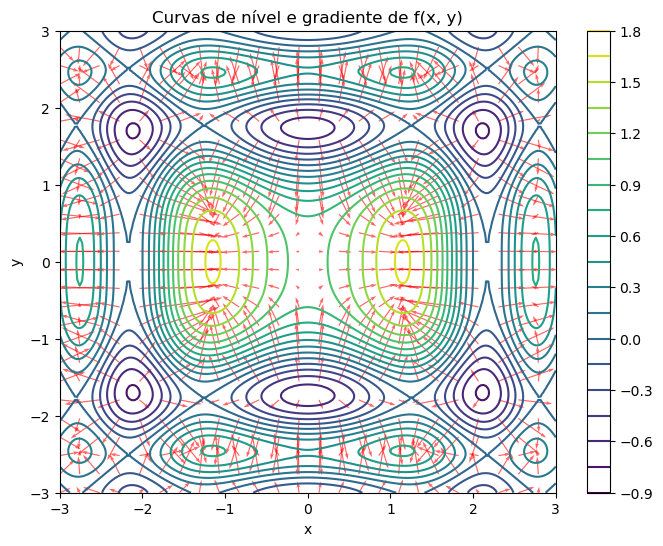

In [ ]:
from numpy import cos, sin, exp

f = lambda x, y: exp(-(x**2 + y**2) / 8) * (sin(x**2) + cos(y**2))

def gradient_f(x, y):
    """Calcula o gradiente da função."""
    termo = exp(-(x**2 + y**2) / 8)
    # Complete a expressão para f_x e f_y:
    f_x = # termo * ...
    f_y = # termo * ...

    return f_x, f_y

# Crie uma malha de pontos:
xs =  # 200 pontos no intervalo [-3, 3]
ys =  # 200 pontos no intervalo [-3, 3]
X, Y =  # ... (meshgrid)
Z = f(X, Y)

# Calculando o gradiente:
FX, FY = gradient_f(X, Y)

# Subamostra da grade para plotar os vetores (recomendado não alterar):
passo = 8   # Ajuste caso queira para mudar a densidade dos vetores
X_sub, Y_sub = X[::passo, ::passo], Y[::passo, ::passo]
FX_sub, FY_sub = FX[::passo, ::passo], FY[::passo, ::passo]

# Plotagem:
fig, ax = plt.subplots()

# Adicione as curvas de nível de f, usando o mapa de cores 'viridis':
curvas =  # ...

# Adicione uma barra de cores:

# Plotando o gradiente:
ax.quiver(X_sub, Y_sub, FX_sub, FY_sub, color="red", alpha=0.6,
          scale=4, scale_units="xy")

# Etique o eixo-x
# Etique o eixo-y
# Adicione o título
# Exiba o resultado

## $ \S 5 $ Visualizando campos vetoriais no espaço

Suponha que $ \boldsymbol F \colon D \subseteq \mathbb R^3 \to \mathbb R^3 $ seja um campo vetorial tridimensional.
O seu **rotacional**, denotado por $ \nabla \times \boldsymbol{F} $, é uma medida da
rotação ou "circulação" do campo em torno de um ponto. Em coordenadas
cartesianas, o rotacional de um campo vetorial de componentes $ f_1,\,f_2,\,f_3
$ é definido pelo determinante simbólico:
$$
\nabla \times \boldsymbol{F} = \begin{vmatrix}
\boldsymbol{i} & \boldsymbol{j} & \boldsymbol{k} \\
\partial_1 & \partial_2 & \partial_3 \\
f_1 & f_2 & f_3
\end{vmatrix}
=
 \left( \partial_2 f_3 - \partial_3 f_2 \right)\, \boldsymbol{i}
 - \left( \partial_1 f_3 - \partial_3 f_1 \right)\,\boldsymbol{j}
 +  \left( \partial_1 f_2 - \partial_2 f_1 \right)\,\boldsymbol{k}
$$
Segue imediatamente do Teorema da $ \S 4 $ que _se $ \boldsymbol F $ é conservativo,
então $ \nabla \times \boldsymbol F = \boldsymbol 0 $. Novamente, esta condição não é
suficiente em geral, mas este é o caso se o domínio for todo o $ \mathbb R^3 $._

__Exemplo 1:__ 
Vamos visualizar o campo magnético $ \boldsymbol{B} $ ao redor de um fio posicionado
ao longo do eixo-$ z $ pelo qual flui uma corrente elétrica:
$$
\boldsymbol{B} = \frac{\mu_0 I}{2 \pi r} \boldsymbol{u}
$$
onde $ \mu_0 $ é a permeabilidade do espaço livre, $ I $ é a corrente, $ r $ a
distância radial do fio e $ \boldsymbol u $ é o vetor unitário na direção azimutal
(i.e., ao redor do eixo-$ z $), ou seja, 
$$
    \boldsymbol u(x, y, z) = \frac{-y\,\boldsymbol{i} + x\, \boldsymbol{j}}{\sqrt{x^2 + y^2}}\,.
$$

Explicitamente, as componentes de $ \boldsymbol B $ são:
$$
\begin{align*}
B_1 &= -\frac{\mu_0\, I\, y}{2 \pi\, (x^2 + y^2)} \\
B_2 &= \frac{\mu_0\, I \,x}{2 \pi\, (x^2 + y^2)} \\
B_3 &= 0
\end{align*}
$$
Observe que este campo vetorial é singular (não está definido) em pontos sobre o eixo-$ z $.
Por causa disto, no código abaixo vamos evitar estes pontos e normalizar $ \boldsymbol B $, ou seja,
vamos na verdade plotar $ \frac{\boldsymbol B}{\Vert \boldsymbol B \Vert} $.

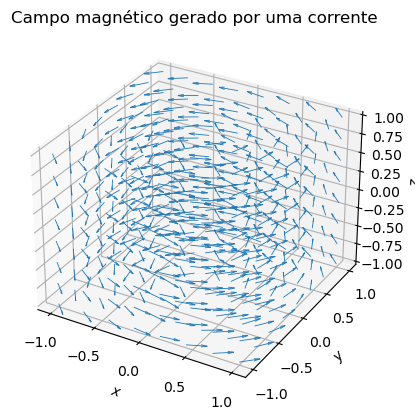

In [ ]:
def B(x, y, z, I=1, mu_0=4 * np.pi * 1e-7):
    # Distância radial r a partir do eixo z:
    r = np.sqrt(x**2 + y**2)
    B_1 = -mu_0 * I * y / (2 * np.pi * r**2)
    B_2 = mu_0 * I * x / (2 * np.pi * r**2)
    B_3 = np.zeros_like(x)
    
    # Lidando com a singularidade em r = 0 (divisão por zero):
    B_1[r == 0] = np.nan
    B_2[r == 0] = np.nan
    
    # Retornando as componentes:
    return B_1, B_2, B_3

# Criando uma malha no espaço 3D:
xs = np.linspace(-1, 1, 8)  # Coordenadas x variando de -1 a 1 com 8 pontos
ys = np.linspace(-1, 1, 8)  # Coordenadas y variando de -1 a 1 com 8 pontos
zs = np.linspace(-1, 1, 8)  # Coordenadas z variando de -1 a 1 com 8 pontos
X, Y, Z = np.meshgrid(xs, ys, zs)  # Malha 3D a partir das coordenadas x, y e z

# Calculando campo magnético nos pontos da malha:
B_1, B_2, B_3 = B(X, Y, Z)

# Normalizando os vetores do campo magnético:
norma = np.sqrt(B_1**2 + B_2**2 + B_3**2)  # Magnitude dos vetores
B_1_unitario = B_1 / norma
B_2_unitario = B_2 / norma
B_3_unitario = B_3 / norma

# Criando uma tela (figura):
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plotando os vetores:
ax.quiver(X, Y, Z, B_1_unitario, B_2_unitario, B_3_unitario, length=0.2, linewidth=0.6)

# Rotulando os eixos, adicionando um título e exibindo o resultado:
ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_zlabel("$ z $")
ax.set_title("Campo magnético gerado por uma corrente")
plt.show()

__Exercício:__ Considere os campos vetoriais em $ \mathbb R^3 $ dados por
\begin{alignat*}{9}
    \boldsymbol{F}(x, y, z) &= (y - x^2)\,\boldsymbol{i} + (z - y^2)\,\boldsymbol{j} + (x - z^2)\,\boldsymbol{k} \\
    \boldsymbol{G}(x, y, z) &= yz\,\boldsymbol{i} + xz\,\boldsymbol{j} + xy\,\boldsymbol{k}
\end{alignat*}

(a) Visualize estes campos no cubo $ [-1, 1]^3 $.

(b) Calcule os rotacionais $ \nabla \times \boldsymbol F $ e $ \nabla \times \boldsymbol G $ e decida se eles são conservativos. Em caso afirmativo, encontre potenciais para eles (funções escalares cujos gradientes coincidem com $ \boldsymbol F $ ou $ \boldsymbol G $).

__Exercício:__ Complete o código abaixo para plotar o campo vetorial
$$ \boldsymbol{F} = (6xy, 3x^2 - 3y^2) $$
na subregião dentro do quadrado $ [-2, 2] \times [-2, 2] $ onde
$ \vert{H(x, y)}\vert \le 2 $, para $ H(x,y) = x^3 - 3xy^2 $.

In [ ]:
# Criando a malha de pontos:
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)

# Definindo a função H:
H = ...

# Máscara booleana: |H(x,y)| ≤ 2:
mascara = ...

# Definindo as componentes U e V do campo F = (U, V):
U = ...
V = ...

# Aplicando a máscara booleana:
U_restrito = np.where(...)
V_restrito = np.where(...)

fig, ax = plt.subplots(figsize=(8, 8))

# Plotando o campo vetorial:
ax.quiver(X, Y, U_restrito, V_restrito, alpha=0.7, color="darkblue", 
         width=0.003, scale=100)

# Vamos desenhar também as curvas de nível de H, restrita à região de interesse:
H_restrito = np.where(mascara, H, np.nan)
niveis = np.linspace(-2, 2, 21)
curvas_de_nivel = ax.contour(X, Y, H_restrito, levels=niveis, colors="gray", 
                            alpha=0.6, linewidths=1)

# Destacando as curvas de nível na fronteira da região:
ax.contour(X, Y, H, levels=[-2, 2], colors="red", linewidths=2, 
          alpha=0.8)

ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.grid(alpha=0.3)
ax.set_title("Campo vetorial $ \\boldsymbol{F} $ e curvas de nível de $ H $")

plt.tight_layout()
plt.show()